In [1]:
from sklearn.model_selection import train_test_split, cross_validate
from utils import load_data

from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = load_data()
X, y = data.drop(columns=['subreddit','author','date','post']), data['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Neural Network

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# help me build a neural network to classify the subreddit of a post
# Convert labels to categorical one-hot encoding
y_train_encoded = pd.get_dummies(y_train)
y_test_encoded = pd.get_dummies(y_test)

# Define the model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train_encoded.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Loss: {loss}, Accuracy: {accuracy}')

/Users/waterdamage123/.pyenv/versions/3.12.4/envs/ml_uni/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
9974/9974 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.2314 - loss: 4.8006 - val_accuracy: 0.2495 - val_loss: 2.2075
Epoch 2/10
9974/9974 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.2656 - loss: 2.2152 - val_accuracy: 0.3002 - val_loss: 2.1507
Epoch 3/10
9974/9974 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.2962 - loss: 2.1508 - val_accuracy: 0.2987 - val_loss: 2.1101
Epoch 4/10
9974/9974 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.3061 - loss: 2.1356 - val_accuracy: 0.3315 - val_loss: 2.0715
Epoch 5/10
9974/9974 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.3144 - loss: 2.1197 - val_accuracy: 0.3481 - val_loss: 2.0548
Epoch 6/10
9974/9974 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.3263 - loss: 2.0965 - val_accuracy: 0.3557 - val_loss: 2.0331
Epoch 7/10
9974/9974 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.3318 - loss: 2.0883 - val_accuracy: 0.3754 - val_loss: 1.9745
Epoch 8/10
9974/9974 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.3339 - loss: 2

In [7]:
# Define the model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train_encoded.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_encoded, epochs=20, batch_size=32, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Loss: {loss}, Accuracy: {accuracy}')

/Users/waterdamage123/.pyenv/versions/3.12.4/envs/ml_uni/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
9974/9974 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.2299 - loss: 4.5202 - val_accuracy: 0.2488 - val_loss: 2.2113
Epoch 2/20
9974/9974 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.2515 - loss: 2.2626 - val_accuracy: 0.2987 - val_loss: 2.1486
Epoch 3/20
9974/9974 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.2619 - loss: 2.2203 - val_accuracy: 0.2845 - val_loss: 2.1935
Epoch 4/20
9974/9974 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.2700 - loss: 2.2094 - val_accuracy: 0.3011 - val_loss: 2.1392
Epoch 5/20
9974/9974 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.2717 - loss: 2.2026 - val_accuracy: 0.3027 - val_loss: 2.1385
Epoch 6/20
9974/9974 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.2790 - loss: 2.1976 - val_accuracy: 0.3007 - val_loss: 2.1427
Epoch 7/20
9974/9974 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.2726 - loss: 2.2044 - val_accuracy: 0.3032 - val_loss: 2.1480
Epoch 8/20
9974/9974 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.2812 - loss: 2

## Undersampled Data

In [3]:
from utils import load_undersampled_split_data

X_train, X_test, y_train, y_test = load_undersampled_split_data()

In [18]:
X_train.head()

,automated_readability_index,coleman_liau_index,flesch_kincaid_grade_level,flesch_reading_ease,gulpease_index,gunning_fog_index,lix,smog_index,wiener_sachtextformel,n_chars,...,tfidf_wish,tfidf_without,tfidf_wonder,tfidf_work,tfidf_worri,tfidf_wors,tfidf_would,tfidf_wrong,tfidf_x200b,tfidf_year
273971,2.978388,4.375263,4.206857,87.674260,74.214153,7.348923,25.634876,7.957252,1.361431,2054,...,0.0,0.000000,0.000000,0.0,0.0,0.052437,0.036552,0.056258,0.0,0.033135
151789,1.152059,3.603642,3.689706,83.748676,85.372549,8.105882,23.205882,8.841846,2.229435,397,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.158986
183063,2.848008,5.467268,3.854609,84.322060,79.150602,6.685852,26.051979,7.859703,1.815801,1377,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.144736
276630,3.512857,4.485251,5.603333,79.825000,72.333333,7.504762,23.523810,7.793538,1.286752,160,...,0.0,0.000000,0.337386,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
274463,3.781696,4.865835,4.986967,84.074406,71.808219,7.479713,24.863666,7.793538,1.245698,1132,...,0.0,0.200106,0.000000,0.0,0.0,0.000000,0.073732,0.000000,0.0,0.066840


In [19]:
y_train.value_counts()

subreddit
EDAnonymous      4335
addiction        4335
adhd             4335
alcoholism       4335
anxiety          4335
autism           4335
bipolarreddit    4335
bpd              4335
depression       4335
healthanxiety    4335
lonely           4335
mentalhealth     4335
ptsd             4335
schizophrenia    4335
socialanxiety    4335
suicidewatch     4335
Name: count, dtype: int64

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau#, TensorBoard

# Convert labels to categorical one-hot encoding
y_train_encoded = pd.get_dummies(y_train)
y_test_encoded = pd.get_dummies(y_test)

# Define the model
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train_encoded.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Defnie callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=5e-6, patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('models/undersampling/(256,256,128,64,16)neural_net.keras', save_best_only=True, monitor='val_loss')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
# tensorboard = TensorBoard(log_dir='./logs')

# Train the model with callbacks
model.fit(X_train, y_train_encoded, epochs=200, batch_size=32, validation_split=0.1,
          callbacks=[early_stopping, model_checkpoint, reduce_lr])#, tensorboard])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Loss: {loss}, Accuracy: {accuracy}')

/Users/waterdamage123/.pyenv/versions/3.12.4/envs/ml_uni/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
1951/1951 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.0669 - loss: 7.6087 - val_accuracy: 0.0000e+00 - val_loss: 4.0377 - learning_rate: 0.0010
Epoch 2/200
1951/1951 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0704 - loss: 2.7067 - val_accuracy: 0.0000e+00 - val_loss: 4.7101 - learning_rate: 0.0010
Epoch 3/200
1951/1951 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0707 - loss: 2.6991 - val_accuracy: 0.0000e+00 - val_loss: 5.2499 - learning_rate: 0.0010
Epoch 4/200
1951/1951 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0674 - loss: 2.6969 - val_accuracy: 0.0000e+00 - val_loss: 5.7771 - learning_rate: 0.0010
Epoch 5/200
1951/1951 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0678 - loss: 2.6938 - val_accuracy: 0.0000e+00 - val_loss: 6.2792 - learning_rate: 0.0010
Epoch 6/200
1951/1951 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0673 - loss: 2.6955 - val_accuracy: 0.0000e+00 - val_loss: 6.7939 - learning_rate: 0.0010
Epoch 7/200
1951/1951 ━━━━━━━━━━━━━━━━━━━━ 6s 

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Normalize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert labels to categorical one-hot encoding
y_train_encoded = pd.get_dummies(y_train)
y_test_encoded = pd.get_dummies(y_test)

# Ensure y_test_encoded has the same columns as y_train_encoded
y_test_encoded = y_test_encoded.reindex(columns=y_train_encoded.columns, fill_value=0)

# Define the model
model = Sequential()
model.add(Dense(512, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train_encoded.shape[1], activation='softmax'))

# Compile the model with a lower initial learning rate
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0.005, patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('models/undersampling/model.keras', save_best_only=True, monitor='val_loss')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Train the model with callbacks
history = model.fit(X_train_scaled, y_train_encoded, epochs=200, batch_size=32, validation_split=0.1,
                    callbacks=[early_stopping, model_checkpoint, reduce_lr])

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test_encoded)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Print model predictions to debug
predictions = model.predict(X_test_scaled[:5])
print(f'Predictions: {predictions}')
print(f'True values: {y_test_encoded[:5].values}')


/Users/waterdamage123/.pyenv/versions/3.12.4/envs/ml_uni/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
1951/1951 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.1401 - loss: 2.6519 - val_accuracy: 0.0000e+00 - val_loss: 6.0123 - learning_rate: 0.0010
Epoch 2/200
1951/1951 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4064 - loss: 1.9648 - val_accuracy: 0.0000e+00 - val_loss: 8.7051 - learning_rate: 0.0010
Epoch 3/200
1951/1951 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4604 - loss: 1.8244 - val_accuracy: 0.0473 - val_loss: 11.4564 - learning_rate: 0.0010
Epoch 4/200
1951/1951 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4785 - loss: 1.7739 - val_accuracy: 0.0604 - val_loss: 14.1573 - learning_rate: 0.0010
Epoch 5/200
1951/1951 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4925 - loss: 1.7350 - val_accuracy: 0.0454 - val_loss: 15.0949 - learning_rate: 0.0010
Epoch 6/200
1951/1951 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5063 - loss: 1.6935 - val_accuracy: 0.0128 - val_loss: 16.6760 - learning_rate: 0.0010
Epoch 7/200
1951/1951 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - a

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Normalize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert labels to categorical one-hot encoding
y_train_encoded = pd.get_dummies(y_train)
y_test_encoded = pd.get_dummies(y_test)

# Ensure y_test_encoded has the same columns as y_train_encoded
y_test_encoded = y_test_encoded.reindex(columns=y_train_encoded.columns, fill_value=0)

# Define the model
model = Sequential()
model.add(Dense(512, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.4))  # Moderate dropout rate
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))  # Moderate dropout rate
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))  # Slightly lower dropout rate for deeper layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))  # Slightly lower dropout rate for deeper layer
model.add(Dense(y_train_encoded.shape[1], activation='softmax'))

# Compile the model with a lower initial learning rate
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0.005, patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('models/undersampling/model.keras', save_best_only=True, monitor='val_loss')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Train the model with callbacks
history = model.fit(X_train_scaled, y_train_encoded, epochs=200, batch_size=32, validation_split=0.1,
                    callbacks=[early_stopping, model_checkpoint, reduce_lr])

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test_encoded)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Print model predictions to debug
predictions = model.predict(X_test_scaled[:5])
print(f'Predictions: {predictions}')
print(f'True values: {y_test_encoded[:5].values}')

Epoch 1/200


/Users/waterdamage123/.pyenv/versions/3.12.4/envs/ml_uni/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1951/1951 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.2721 - loss: 2.2931 - val_accuracy: 0.1399 - val_loss: 7.3995 - learning_rate: 0.0010
Epoch 2/200
1951/1951 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5041 - loss: 1.6854 - val_accuracy: 0.1207 - val_loss: 9.6437 - learning_rate: 0.0010
Epoch 3/200
1951/1951 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5290 - loss: 1.6048 - val_accuracy: 0.0937 - val_loss: 12.6998 - learning_rate: 0.0010
Epoch 4/200
1951/1951 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5411 - loss: 1.5635 - val_accuracy: 0.1508 - val_loss: 12.5696 - learning_rate: 0.0010
Epoch 5/200
1951/1951 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5558 - loss: 1.5045 - val_accuracy: 0.0983 - val_loss: 15.4949 - learning_rate: 0.0010
Epoch 6/200
1951/1951 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5609 - loss: 1.4912 - val_accuracy: 0.1243 - val_loss: 16.3870 - learning_rate: 0.0010
Epoch 7/200
1951/1951 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.5795 - l

3687/3687 ━━━━━━━━━━━━━━━━━━━━ 2s 593us/step


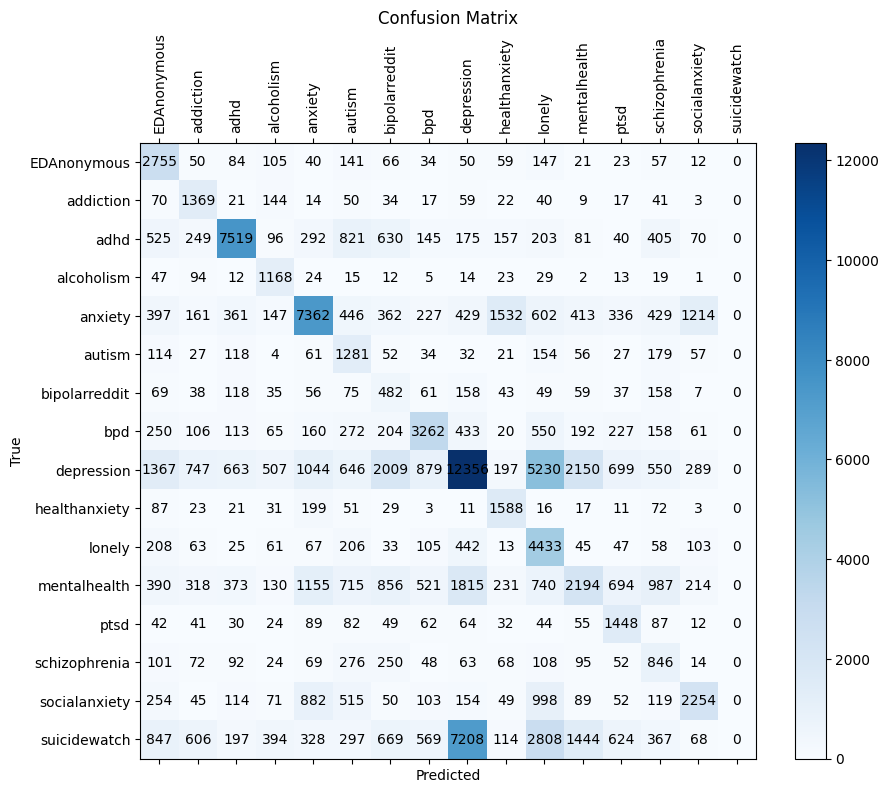

In [23]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Get the predicted classes
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_encoded.values, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(cm, cmap='Blues')
fig.colorbar(cax)

# Set axis labels
ax.set_xticks(np.arange(len(y_test_encoded.columns)))
ax.set_yticks(np.arange(len(y_test_encoded.columns)))
ax.set_xticklabels(y_test_encoded.columns, rotation=90)
ax.set_yticklabels(y_test_encoded.columns)

# Set axis titles
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Annotate each cell with the numeric value
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, str(cm[i, j]), va='center', ha='center', color='black')

plt.show()

In [60]:
y_pred_classes.shape

(117958,)

## Simpler model

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Normalize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert labels to categorical one-hot encoding
y_train_encoded = pd.get_dummies(y_train)
y_test_encoded = pd.get_dummies(y_test)

# Ensure y_test_encoded has the same columns as y_train_encoded
y_test_encoded = y_test_encoded.reindex(columns=y_train_encoded.columns, fill_value=0)

# Define the model
model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.3))  # Slightly lower dropout rate for deeper layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))  # Slightly lower dropout rate for deeper layer
model.add(Dense(y_train_encoded.shape[1], activation='softmax'))

# Compile the model with a lower initial learning rate
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0.005, patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('models/undersampling/model.keras', save_best_only=True, monitor='val_loss')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Train the model with callbacks
history = model.fit(X_train_scaled, y_train_encoded, epochs=200, batch_size=32, validation_split=0.1,
                    callbacks=[early_stopping, model_checkpoint, reduce_lr])

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test_encoded)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Print model predictions to debug
predictions = model.predict(X_test_scaled[:5])
print(f'Predictions: {predictions}')
print(f'True values: {y_test_encoded[:5].values}')

/Users/waterdamage123/.pyenv/versions/3.12.4/envs/ml_uni/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
1951/1951 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.3397 - loss: 2.1403 - val_accuracy: 0.1306 - val_loss: 7.0599 - learning_rate: 0.0010
Epoch 2/200
1951/1951 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5264 - loss: 1.5554 - val_accuracy: 0.1289 - val_loss: 9.0916 - learning_rate: 0.0010
Epoch 3/200
1951/1951 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5478 - loss: 1.4834 - val_accuracy: 0.1315 - val_loss: 10.9835 - learning_rate: 0.0010
Epoch 4/200
1951/1951 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5592 - loss: 1.4458 - val_accuracy: 0.1348 - val_loss: 12.3975 - learning_rate: 0.0010
Epoch 5/200
1951/1951 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5635 - loss: 1.4214 - val_accuracy: 0.1263 - val_loss: 14.9957 - learning_rate: 0.0010
Epoch 6/200
1951/1951 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5675 - loss: 1.4026 - val_accuracy: 0.1456 - val_loss: 16.3117 - learning_rate: 0.0010
Epoch 7/200
1951/1951 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy:

## Gridsearch

In [53]:
from tensorflow import keras
import keras_tuner as kt

# Define the model building function for Keras Tuner
def build_model(hp):
    model = Sequential()
    for n_layers in range(1, hp.Choice('num_layers', [4, 5, 6, 7])):
        model.add(Dense(hp.Choice(f'layer_{n_layers}_units', [64, 128, 256]), input_dim=X_train_scaled.shape[1], activation='relu'))
        model.add(Dropout(hp.Choice(f'layer_{n_layers}_dropout', [0.1, 0.2, 0.3])))
    model.add(Dense(y_train_encoded.shape[1], activation='softmax'))

    model.compile(
        optimizer='rmsprop',
        loss='categorical_crossentropy',
        metrics=['accuracy', 'recall', 'precision', 'f1_score']
    )
    return model

# Instantiate the tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    hyperband_iterations=2,
    directory='models/hp_tuning',
    project_name='neural_net'
)

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0.005, patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Perform the hyperparameter search
tuner.search(X_train_scaled, y_train_encoded, epochs=50, validation_split=0.1, callbacks=[early_stopping, reduce_lr])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters()


Reloading Tuner from models/hp_tuning/neural_net/tuner0.json


In [58]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 3,
 'optimizer': 'rmsprop',
 'layer_1_units': 256,
 'layer_1_dropout': 0.3,
 'layer_2_units': 256,
 'layer_2_dropout': 0.2,
 'layer_3_units': 128,
 'layer_3_dropout': 0.3,
 'tuner/epochs': 10,
 'tuner/initial_epoch': 4,
 'tuner/bracket': 2,
 'tuner/round': 2,
 'tuner/trial_id': '0044'}

In [ ]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 7,
 'layer_1_units': 256,
 'layer_1_dropout': 0.1,
 'layer_2_units': 64,
 'layer_2_dropout': 0.1,
 'layer_3_units': 256,
 'layer_3_dropout': 0.2,
 'layer_4_units': 128,
 'layer_4_dropout': 0.1,
 'layer_5_units': 256,
 'layer_5_dropout': 0.1,
 'layer_6_units': 256,
 'layer_6_dropout': 0.1,
 'tuner/epochs': 10,
 'tuner/initial_epoch': 4,
 'tuner/bracket': 1,
 'tuner/round': 1,
 'tuner/trial_id': '0018'}